<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: Dark Quality Test

### Table of Contents
<div style="text-align: left"> 

<br> [Introduction](#intro_ID) <br> [Imports](#imports_ID) <br> [Getting the Data](#data_ID) <br> [Run Dark Correction Pipeline Step](#pipeline_ID) <br> [Check the slope of the median ramp for the detector](#slope_ID) <br> 

</div>

<a id="intro_ID"></a>
# Introduction

The dark current step removes dark current from a JWST exposure by subtracting dark current data stored in a dark reference file.

For more details, visit the documentation here: https://jwst-pipeline.readthedocs.io/en/latest/jwst/dark_current/description.html


### Defining Term

JWST: James Webb Space Telescope

OUT: Other Useful Terms

[Top of Page](#title_ID)

<a id="imports_ID"></a>
# Imports

* jwst.datamodels for building model for JWST Pipeline
* jwst.dark_current.dark_sub.do_correction to perform the dark correction
* matplotlib.pyplot.plt to generate plot
* numpy for array parsing and masking
* os for operating system commands.

* matplotlib inline for plot rendering in notebook

[Top of Page](#title_ID)

In [1]:
from jwst.datamodels import DarkMIRIModel, MIRIRampModel
from jwst.dark_current.dark_sub import do_correction
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

<a id="data_ID"></a>
# Getting the Data

We are constructing a fake MIRI/Dark model dataset using the datamodels library in JWST.

Mention something about artifactory... Or how or where we store and access data.

[Top of Page](#title_ID)

In [2]:
# size of integration
nints = 1
ngroups = 7
xsize = 1032
ysize = 1024

# Define data's shape
csize = (nints, ngroups, ysize, xsize)
data = np.random.rand(nints, ngroups, ysize, xsize)*1e6

# create a JWST MIRI rampmodel
dm_ramp = MIRIRampModel(data=data)

dm_ramp.meta.instrument.name = 'MIRI'
dm_ramp.meta.observation.date = '2018-01-01'
dm_ramp.meta.observation.time = '00:00:00'
dm_ramp.meta.subarray.xstart = 1
dm_ramp.meta.subarray.xsize = xsize
dm_ramp.meta.subarray.ystart = 1
dm_ramp.meta.subarray.ysize = ysize
dm_ramp.meta.description = 'Fake data.'


# Define shape of dark model
csize = (nints*5, ngroups, ysize, xsize)
data = np.random.rand(nints, ngroups, ysize, xsize) * 1e2

# Create dark datamodel
dark = DarkMIRIModel(data=data)

dark.meta.instrument.name = 'MIRI'
dark.meta.date = '2018-01-01'
dark.meta.time = '00:00:00'
dark.meta.subarray.xstart = 1
dark.meta.subarray.xsize = xsize
dark.meta.subarray.ystart = 1
dark.meta.subarray.ysize = ysize
dark.meta.exposure.nframes = 1
dark.meta.exposure.groupgap = 0
dark.meta.description = 'Fake data.'
dark.meta.reftype = 'DarkModel'
dark.meta.pedigree = 'Dummy'
dark.meta.useafter = '2015-10-01T00:00:00'

# create raw input data for step
dm_ramp.meta.exposure.nframes = 1
dm_ramp.meta.exposure.groupgap = 0

<a id="pipeline_ID"></a>
# Run Dark Correction Pipeline Step

Define the output file and run the linearity correction step of the pipeline.

[Top of Page](#title_ID)

In [3]:
# run pipeline
outfile = do_correction(dm_ramp, dark)

2019-05-09 13:22:25,262 - stpipe - INFO - Science data nints=1, ngroups=7, nframes=1, groupgap=0


2019-05-09 13:22:25,263 - stpipe - INFO - Dark data nints=1, ngroups=7, nframes=1, groupgap=0


<a id="slope_ID"></a>
# Check the slope of the median ramp for the detector

The count rate of the dark subtracted ramp should be small (< 0.1?)

[Top of Page](#title_ID)

Slope of median ramp before dark subtraction: 90.88281250002456 counts/group
Slope of median ramp after dark subtraction: 91.63839285716269 counts/group


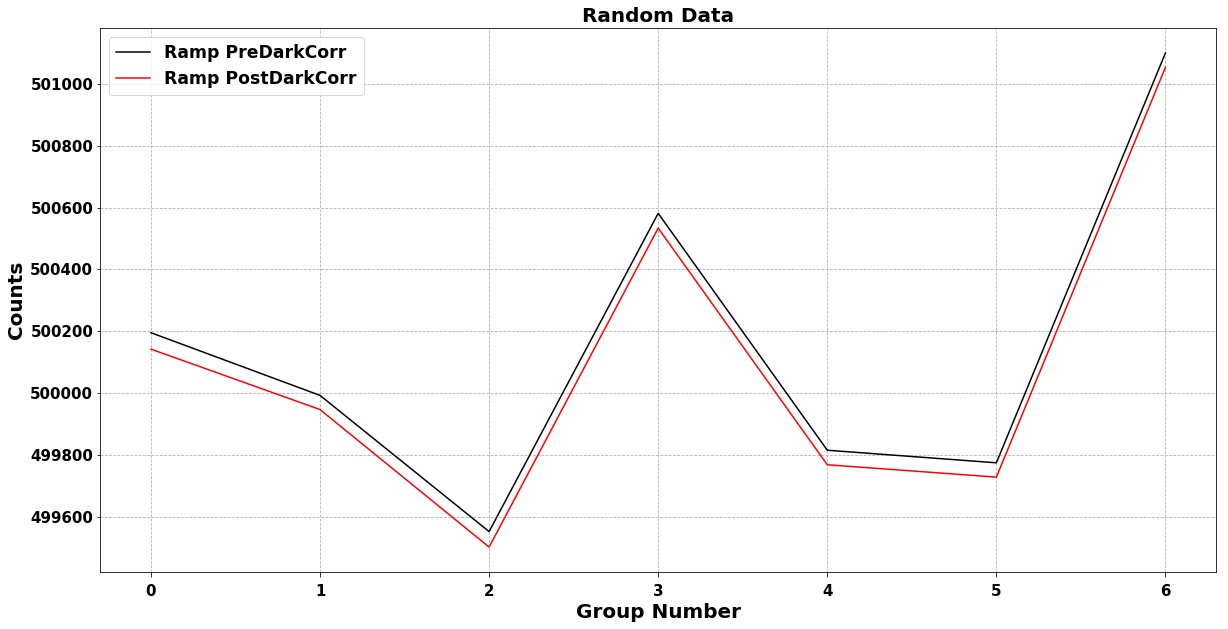

In [4]:
med_in = np.median(dm_ramp.data[0, :, :, :], axis=(1, 2))
med_out = np.median(outfile.data[0, :, :, :,], axis=(1,2))

groups = np.arange(med_in.shape[0])

slope_in = np.polyfit(groups, med_in, 1)
slope_out = np.polyfit(groups, med_out, 1)

print(
"Slope of median ramp before dark subtraction: {} counts/group".format(
    slope_in[0]))
print(
"Slope of median ramp after dark subtraction: {} counts/group".format(
    slope_out[0]))

# Set plot params
plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.figure(figsize=(20,10))
plt.grid(True, ls='--')
plt.title('Random Data', fontsize=20, fontweight='bold')
plt.plot(med_in, c='k', label= 'Ramp PreDarkCorr')
plt.plot(med_out,c='r', label='Ramp PostDarkCorr')
plt.xlabel('Group Number', fontsize=20, fontweight='bold')
plt.ylabel('Counts', fontsize=20, fontweight='bold')
plt.legend(fontsize='xx-large')

<a id="about_ID"></a>
## About this Notebook
**Author:** Mees Fix, RIA MESA Branch
<br>**Updated On:** 03/01/2019

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 